In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

In [2]:
# we create 40 separable points
x, y = make_blobs(n_samples=40, centers=2, random_state=6)

In [3]:
# fit the model, don't regularize for illustration purposes
model = svm.SVC(kernel='linear', C=1000)
model.fit(x, y)

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [4]:
x_min = x[:, 0].min()
x_max = x[:, 0].max()
y_min = x[:, 1].min()
y_max = x[:, 1].max()

w = model.coef_[0]
print('coef_', w)
a = -w[0] / w[1]
xx = np.linspace(x_min, x_max)
yy = a * xx - (model.intercept_[0]) / w[1]
print('intercept_', model.intercept_)
print(xx)
print(yy)

margin = 1 / np.sqrt(np.sum(model.coef_ ** 2))
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin

coef_ [-0.2539717  -0.83806387]
intercept_ [-3.21132826]
[ 4.29225906  4.41871263  4.54516619  4.67161975  4.79807331  4.92452687
  5.05098043  5.177434    5.30388756  5.43034112  5.55679468  5.68324824
  5.8097018   5.93615537  6.06260893  6.18906249  6.31551605  6.44196961
  6.56842317  6.69487674  6.8213303   6.94778386  7.07423742  7.20069098
  7.32714454  7.45359811  7.58005167  7.70650523  7.83295879  7.95941235
  8.08586591  8.21231948  8.33877304  8.4652266   8.59168016  8.71813372
  8.84458728  8.97104085  9.09749441  9.22394797  9.35040153  9.47685509
  9.60330865  9.72976222  9.85621578  9.98266934 10.1091229  10.23557646
 10.36203002 10.48848359]
[-5.13259282 -5.17091403 -5.20923525 -5.24755646 -5.28587768 -5.3241989
 -5.36252011 -5.40084133 -5.43916254 -5.47748376 -5.51580498 -5.55412619
 -5.59244741 -5.63076862 -5.66908984 -5.70741105 -5.74573227 -5.78405349
 -5.8223747  -5.86069592 -5.89901713 -5.93733835 -5.97565957 -6.01398078
 -6.052302   -6.09062321 -6.12894443 -6.16

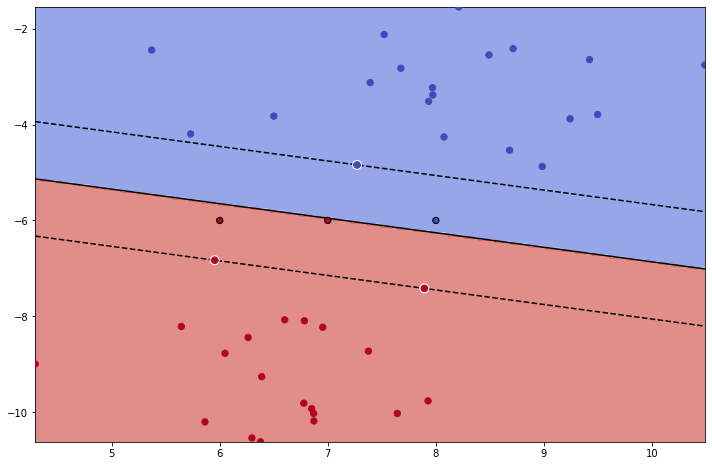

In [11]:
XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
Z = model.predict(np.c_[XX.ravel(), YY.ravel()])
Z = Z.reshape(XX.shape)

figsize = np.array(plt.rcParams["figure.figsize"]) * 2
plt.figure(figsize=figsize.tolist())

plt.contourf(XX, YY, Z, cmap='coolwarm', alpha=0.6)
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=80, facecolors='none', zorder=10, edgecolors='white')
plt.scatter(x[:, 0], x[:, 1], c=y, zorder=10, cmap='coolwarm', edgecolor='face', s=40)

x_test = np.array([[6.0, -6.0], [7.0, -6.0], [8.0, -6.0]])
pred_test = model.predict(x_test)
plt.scatter(x_test[:, 0], x_test[:, 1], c=pred_test, zorder=10, cmap='coolwarm', edgecolor='k', s=40)

plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()

In [12]:
model.support_vectors_


array([[ 7.27059007, -4.84225716],
       [ 5.95313618, -6.82945967],
       [ 7.89359985, -7.41655113]])

In [7]:
model.dual_coef_


array([[-0.38347857,  0.25400249,  0.12947608]])

In [8]:
model.C


1000

In [9]:
model.predict([[6.0, -6.0]])

array([1])

## Some links
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

https://scikit-learn.org/stable/modules/svm.html

https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html

https://scikit-learn.org/stable/auto_examples/svm/plot_svm_margin.html

https://scikit-learn.org/stable/auto_examples/exercises/plot_iris_exercise.html

https://towardsdatascience.com/support-vector-machine-python-example-d67d9b63f1c8

https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html
